#IMPORT LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [30]:
from pathlib import Path

f_path = Path("/content/kddcup.names")
names = f_path.read_text()
print(names)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [31]:
cols = """duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

# Creating target column
attributes = list(filter(None, map(str.strip, cols.split(','))))
attributes.append('target')

# Print the list and its length
print(len(attributes))


42


In [32]:
atk_path = Path("/content/training_attack_types")
atk_type = atk_path.read_text()
print(atk_type)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [33]:
types_of_attack = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

CREATING DATAFRAME

In [34]:
! unzip /content/kddcup.data_10_percent.gz.zip

Archive:  /content/kddcup.data_10_percent.gz.zip
replace kddcup.data_10_percent.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
kdd_df = pd.read_csv("/content/kddcup.data_10_percent.gz", names=attributes)

# Appending attack type
def get_attack_type(r):
    return types_of_attack[r[:-1]]

kdd_df['Attack Type'] = kdd_df['target'].apply(get_attack_type)
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [36]:
kdd_df.groupby('Attack Type').size()

,0
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [37]:
kdd_df.shape

(494021, 43)

In [38]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# EXPLORATORY DATA ANALYSIS

In [39]:
# Identifying Null entries
kdd_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


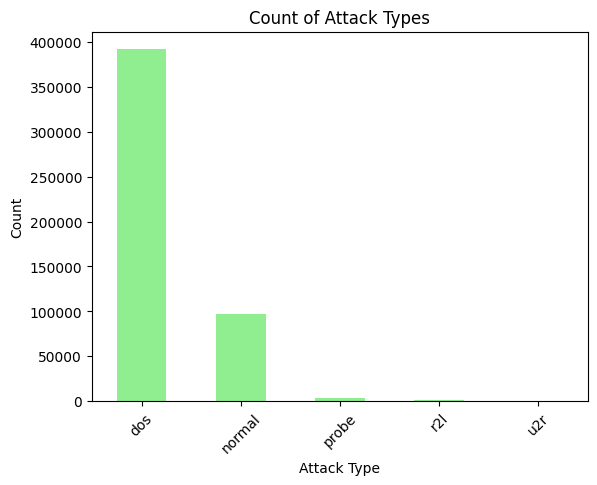

In [40]:
# Visualize Target features
# Plot for Attack type
kdd_df['Attack Type'].value_counts().plot(kind='bar', title='Count of Attack Types', ylabel='Count',color="lightgreen")
plt.xticks(rotation=45)
plt.show()


In [41]:
kdd_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

Correlation Analysis

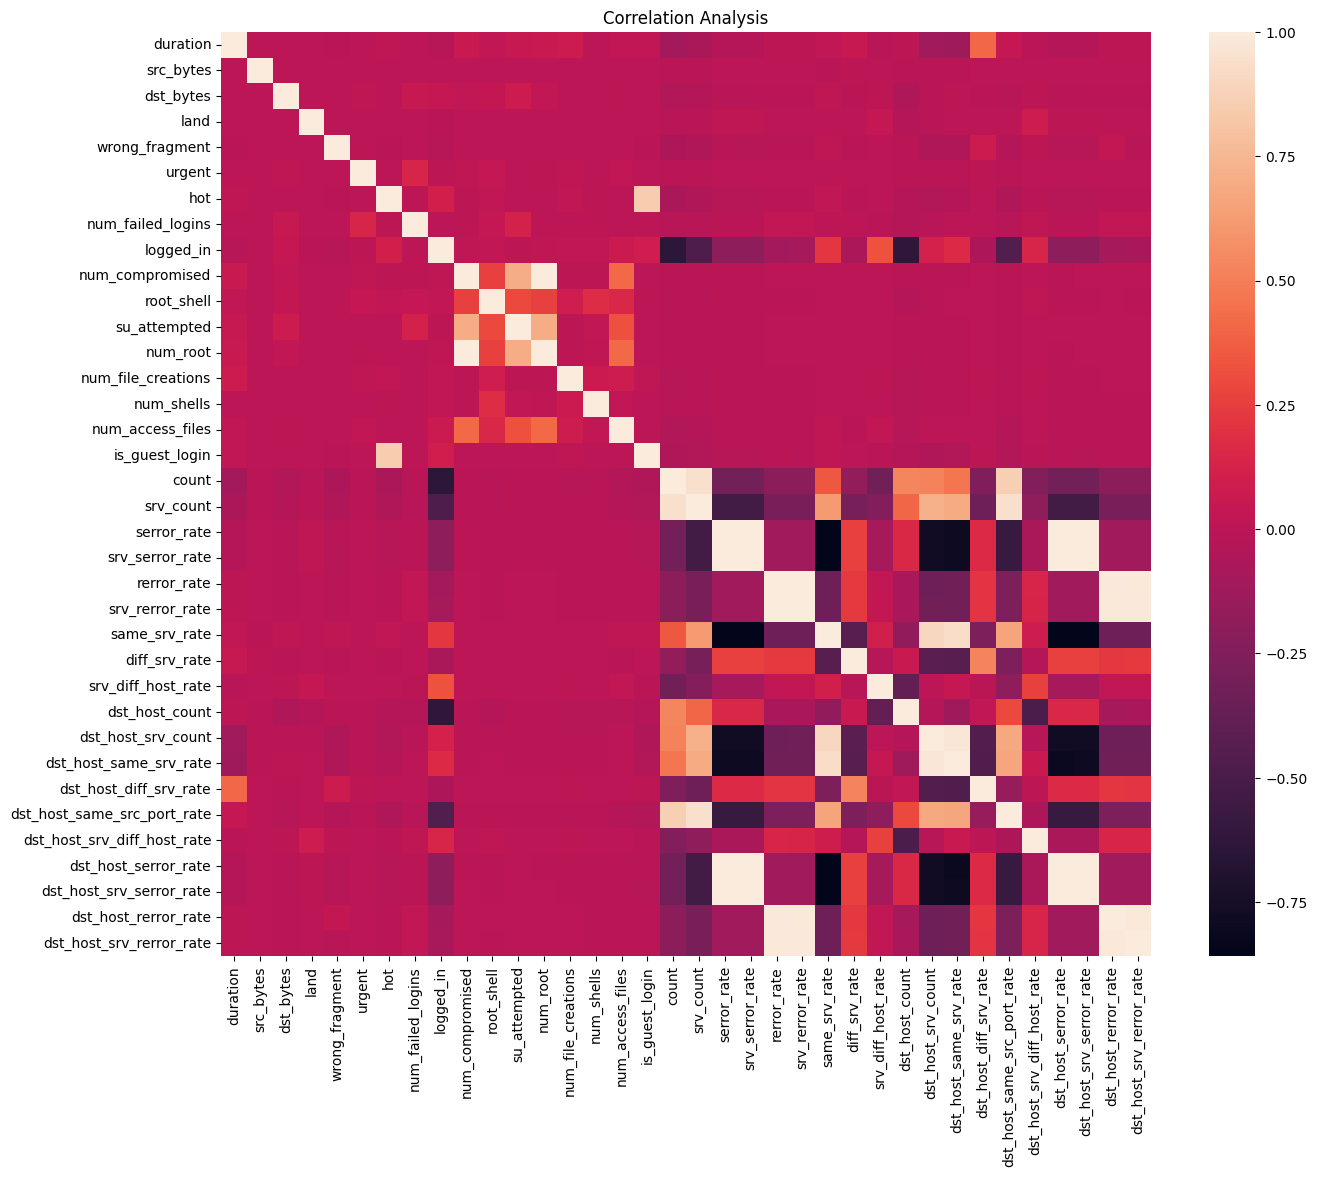

In [44]:
# Correlation heatmap
df = kdd_df.select_dtypes(include=np.number).dropna(axis=1).loc[:, kdd_df.nunique() > 1].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(df, fmt=".2f")
plt.title('Correlation Analysis')
plt.show()


In [45]:
# Removing highly correlated columns
high_corr_col = [
    'num_root',
    'srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'dst_host_same_srv_rate'
]

kdd_df.drop(columns = high_corr_col, inplace=True)


In [46]:
kdd_df.shape

(494021, 35)

In [47]:
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


Label Encoding

protocol_type

In [48]:
kdd_df['protocol_type'].groupby(kdd_df['protocol_type']).count()

,protocol_type
protocol_type,
icmp,283602
tcp,190065
udp,20354


In [50]:
# Encode protocol type
kdd_df['protocol_type'] = pd.Categorical(kdd_df['protocol_type']).codes


In [51]:
kdd_df['protocol_type'].groupby(kdd_df['protocol_type']).count()

,protocol_type
protocol_type,
0,283602
1,190065
2,20354


flag

In [52]:
kdd_df['flag'].groupby(kdd_df['flag']).count()

,flag
flag,
OTH,8
REJ,26875
RSTO,579
RSTOS0,11
RSTR,903
S0,87007
S1,57
S2,24
S3,10


In [53]:
# Encode flag
kdd_df['flag'] = pd.Categorical(kdd_df['flag']).codes


In [54]:
kdd_df['flag'].groupby(kdd_df['flag']).count()

,flag
flag,
0,8
1,26875
2,579
3,11
4,903
5,87007
6,57
7,24
8,10


Attack Type

In [56]:
kdd_df['Attack Type'].groupby(kdd_df['Attack Type']).count()

,Attack Type
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [57]:
# Encode Attack Type
kdd_df['Attack Type'] = pd.Categorical(kdd_df['Attack Type']).codes


In [58]:
kdd_df['Attack Type'].groupby(kdd_df['Attack Type']).count()

,Attack Type
Attack Type,
0,391458
1,97278
2,4107
3,1126
4,52


In [59]:
# Data after encoding
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,1
1,0,1,http,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,1
2,0,1,http,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,1
3,0,1,http,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,1
4,0,1,http,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,1


In [62]:
kdd_df.drop('service',axis = 1,inplace= True)

In [70]:
kdd_df.shape

(494021, 33)

# STANDARDIZATION

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Define the target variable and feature variable
Y = kdd_df['Attack Type']  # Target variable
X = kdd_df.loc[:, kdd_df.columns != 'Attack Type']

# MinMaxScaler
mm_scaler = MinMaxScaler()
Scaled_X = mm_scaler.fit_transform(X)


# PRINCIPAL COMPONENT ANALYSIS

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca_X = pca.fit_transform(Scaled_X)

print(f"Number of components before PCA: {Scaled_X.shape[1]}, reduced to {pca.n_components_} components")

Number of components before PCA: 32, reduced to 20 components


# MODEL BUILDING

In [76]:
# Function for Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def validate_model(y_true, pred_y):

    print("Classification Report:\n", classification_report(y_true, pred_y))

    cm = confusion_matrix(y_true, pred_y)
    print("Confusion Matrix:\n", cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Derived Label')
    plt.ylabel('Actual Label')
    plt.show()

## CNN

Epoch 1/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9847 - loss: 0.0612 - val_accuracy: 0.9981 - val_loss: 0.0076
Epoch 2/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9981 - loss: 0.0076 - val_accuracy: 0.9987 - val_loss: 0.0054
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9988 - loss: 0.0054
Test accuracy: [0.005448031239211559, 0.9986944198608398]
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       0.99      0.97      0.98       850
           3       0.90      0.84      0.87       235
           4       0.86      0.50      0.63        12

    accuracy                           1.00     98805
   macro avg       0.95      0.86      0.90     98805
weighted avg       1.00      1.00      1.00     98805

Confusion Matrix:
 [[78330    24     0     1 

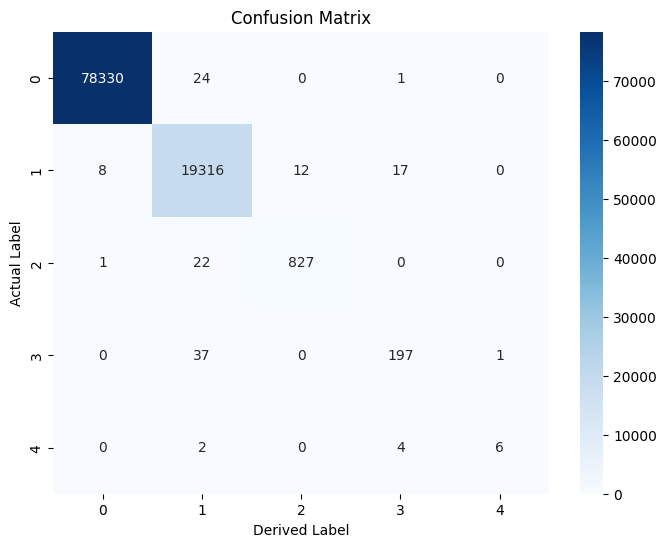

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Reshape data for CNN
X_train, X_test, y_train, y_test = train_test_split(pca_X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=16, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='tanh'))

# Determine the number of unique classes in y_train
num_classes = len(np.unique(y_train))
model_cnn.add(Dense(num_classes, activation='softmax')) # Changed from y_train.shape[1] to num_classes

# Compile the model
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# One-hot encode the target variables
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Train the model with fewer epochs
model_cnn.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))  # Reduced epochs

# Evaluate the model
cnn_acc = model_cnn.evaluate(X_test, y_test)
print('Test accuracy:', cnn_acc)

# Make predictions
pred_cnn_y = model_cnn.predict(X_test)

# Convert predictions back to class labels
pred_cnn_y = np.argmax(pred_cnn_y, axis=1)

# Print classification report and confusion matrix
validate_model(np.argmax(y_test, axis=1), pred_cnn_y) # Convert y_test back to class labels

## RNN

In [ ]:
# prompt: Write code for rnn

from tensorflow.keras.layers import LSTM

# Reshape data for RNN (LSTM)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(pca_X, Y, test_size=0.2, random_state=42)
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], 1)
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], 1)


# Create the RNN (LSTM) model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='tanh', input_shape=(X_train_rnn.shape[1], 1)))
model_rnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model with fewer epochs
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=2, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))


# Evaluate the model
rnn_acc = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print('Test accuracy:', rnn_acc)


# Make predictions
pred_rnn_y = model_rnn.predict(X_test_rnn)

# Convert predictions back to class labels
pred_rnn_y = np.argmax(pred_rnn_y, axis=1)

# Print classification report and confusion matrix
validate_model(y_test_rnn, pred_rnn_y)


Epoch 1/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 186s 15ms/step - accuracy: 0.9536 - loss: 0.1489 - val_accuracy: 0.9908 - val_loss: 0.0337
Epoch 2/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 159s 13ms/step - accuracy: 0.9920 - loss: 0.0303 - val_accuracy: 0.9935 - val_loss: 0.0238
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9935 - loss: 0.0235
Test accuracy: [0.023822080343961716, 0.9934922456741333]
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     78355
           1       0.97      1.00      0.98     19353
           2       0.97      0.92      0.95       850
           3       0.88      0.80      0.84       235
           4       0.00      0.00      0.00        12

    accuracy                           0.99     98805
   macro avg       0.76      0.74      0.75     98805
weighted avg       0.99      0.99      0.99     98805

Confusion Matrix:
 [[77888   467     0 

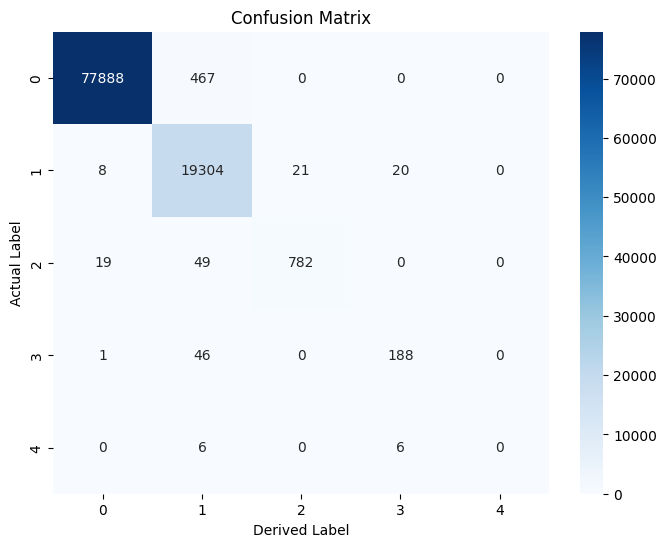

In [81]:


from tensorflow.keras.layers import LSTM

# Reshape data for RNN (LSTM)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(pca_X, Y, test_size=0.2, random_state=42)
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], 1)
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], 1)


# Create the RNN (LSTM) model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='tanh', input_shape=(X_train_rnn.shape[1], 1)))
model_rnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model with fewer epochs
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=2, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))


# Evaluate the model
rnn_acc = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print('Test accuracy:', rnn_acc)

# Make predictions
pred_rnn_y = model_rnn.predict(X_test_rnn)

# Convert predictions back to class labels
pred_rnn_y = np.argmax(pred_rnn_y, axis=1)

# Print classification report and confusion matrix
validate_model(y_test_rnn, pred_rnn_y)


## DNN

Epoch 1/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9902 - loss: 0.0507 - val_accuracy: 0.9983 - val_loss: 0.0061
Epoch 2/2
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9986 - val_loss: 0.0046
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9987 - loss: 0.0043
Test accuracy: [0.004598876461386681, 0.9986438155174255]
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       0.99      0.98      0.99       850
           3       0.77      0.88      0.82       235
           4       0.89      0.67      0.76        12

    accuracy                           1.00     98805
   macro avg       0.93      0.90      0.91     98805
weighted avg       1.00      1.00      1.00     98805

Confusion Matrix:
 [[78346     8     1     0 

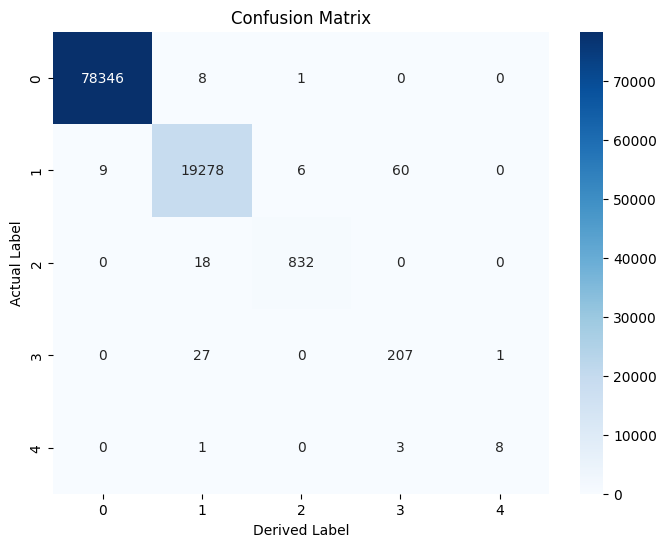

In [82]:
# Reshape data for DNN
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(pca_X, Y, test_size=0.2, random_state=42)


# Create the DNN model
model_dnn = Sequential()
model_dnn.add(Dense(100, activation='relu', input_shape=(X_train_dnn.shape[1],)))
model_dnn.add(Dense(50, activation='relu'))
model_dnn.add(Dense(num_classes, activation='softmax'))


# Compile the model
model_dnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model with fewer epochs
model_dnn.fit(X_train_dnn, y_train_dnn, epochs=2, batch_size=32, validation_data=(X_test_dnn, y_test_dnn))


# Evaluate the model
dnn_acc = model_dnn.evaluate(X_test_dnn, y_test_dnn)
print('Test accuracy:', dnn_acc)

# Make predictions
pred_dnn_y = model_dnn.predict(X_test_dnn)

# Convert predictions back to class labels
pred_dnn_y = np.argmax(pred_dnn_y, axis=1)

# Print classification report and confusion matrix
validate_model(y_test_dnn, pred_dnn_y)
